<a href="https://colab.research.google.com/github/kshitijrajsharma/VirtuGhan/blob/master/VirtuGhan_Python_Usage_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install

Installation is easy just grab it form pip

In [ ]:
!pip install VirtuGhan==0.6.0

## Setup

Define the parameters for your computation

Use this for visual image timeseries 
```python
formula="band1"
band1="visual"
band2=None
operation=None
timeseries=True
```

In [4]:
# Define the bounding box
bbox =  [83.97606554165884,28.197912265455415,83.99861638423164,28.211830969044158]

# Define the parameters
start_date = "2024-08-01"
end_date = "2025-01-01" # Process two years worth of data
cloud_cover = 30
formula = "(band2-band1)/(band2+band1)"  # NDVI formula
band1 = "red"
band2 = "nir"
operation = "median"
output_dir = "virtughan_output"
timeseries = True
workers = 1 # no of parallel workers
smart_filter=False

## Cleanup
Lets clear if there are previous output in the dir

In [7]:
import shutil , os
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)

## Example compute on time dimension
You can run computation now , You can visualize the results or download them from the files directly after computation is done

In [6]:
from vcube.engine import VCubeProcessor

processor = VCubeProcessor(
    bbox,
    start_date,
    end_date,
    cloud_cover,
    formula,
    band1,
    band2,
    operation,
    timeseries,
    output_dir,
    workers=workers,
    smart_filter=smart_filter
)
processor.compute()

Engine starting...
Searching STAC .....
Total scenes found: 28
Scenes covering input area: 28
Scenes after removing overlaps: 14
Computing Band Calculation: 100%|██████████| 14/14 [01:25<00:00,  6.12s/it]
Aggregating results...
Saving aggregated result with colormap...


## Example on the fly tile computation

Here computation will be done alike google earth engine , you zoom out do computation , zoom in do computation based on your formula and resolution will differ accordingly as resampling will happen

In [8]:
import mercantile
from PIL import Image
from io import BytesIO
from vcube.tile import TileProcessor

# Define the parameters
lat, lon = 28.28139, 83.91866
zoom_level = 12
x, y, z = mercantile.tile(lon, lat, zoom_level)

tile_processor = TileProcessor()

image_bytes, feature = await tile_processor.cached_generate_tile(
    x=x,
    y=y,
    z=z,
    start_date="2020-01-01",
    end_date="2025-01-01",
    cloud_cover=30,
    band1="red",
    band2="nir",
    formula="(band2-band1)/(band2+band1)",
    colormap_str="RdYlGn",
)

image = Image.open(BytesIO(image_bytes))

print(f"Tile: {x}_{y}_{z}")
print(f"Date: {feature['properties']['datetime']}")
print(f"Cloud Cover: {feature['properties']['eo:cloud_cover']}%")

image.save(f'tile_{x}_{y}_{z}.png')


Tile: 3002_1712_12
Date: 2024-12-30T05:10:56.883000Z
Cloud Cover: 1.140427%


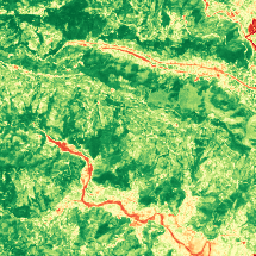

In [9]:
from IPython.display import Image as display_image
display_image(f'tile_{x}_{y}_{z}.png')


## Extract Sentinel-2 Images for your AOI 
This example showcase how you can select the band you want and extract sentinel-2 images just for your area of interest 

In [1]:
import os 

bbox = [83.84765625, 28.22697003891833, 83.935546875, 28.304380682962773]
start_date = "2024-12-15"
end_date = "2024-12-31"
cloud_cover = 30
bands_list = ["blue","green","red", "nir","swir16","swir22"] # order of the bands will result order in the resulting output
output_dir = "./sentinel_images"
workers = 1  

os.makedirs(output_dir, exist_ok=True)

In [ ]:
from vcube.extract import ExtractProcessor, VALID_BANDS

print("Available bands: ", VALID_BANDS)

extractor = ExtractProcessor(
    bbox,
    start_date,
    end_date,
    cloud_cover,
    bands_list,
    output_dir,
    workers=workers,
)
extractor.extract()

Extracting bands...
Total scenes found: 4
Scenes covering input area: 4
Scenes after removing overlaps: 4
Filter from : 2024-12-15 to : 2024-12-30
Selecting 1 image per 4 days
Scenes after applying smart filter: 4
Extracting Bands: 100%|██████████| 4/4 [01:40<00:00, 25.10s/it]
